In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import glob
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts/')
from Acompanhamento import *

In [2]:
METODO = 'over_v0'
TARGET = 'Back_Over'
ODDS = 'Odds_Over'
SPREAD = 1
STAKE = 1


# Dados de backtest
wr = 56
roi = 15.15
drawdown = 0
med_gain = 1.07
med_loss = -1.00
ev = 0.10

In [3]:
df_hist = pd.read_excel('../data/metodos_hist/v0_hist.xlsx')
df_hist['Date'] = pd.to_datetime(df_hist['Date']).dt.date
df_hist.loc[(df_hist['Resultado'] == 'green'), TARGET] = 1
df_hist.loc[(df_hist['Resultado'] == 'red'), TARGET] = 0

BACKTEST -----------------------
WR: 56.00% | ROI: 15.15% | Drawdown: 0.00%
MedGain: 1.07 | MedLoss: -1.00 | EV: 0.10

REALIDADE -----------------------
WR: 59.21% | ROI: 12.21% | Drawdown: -9.10%
MedGain: 0.90 | MedLoss: -1.00 | EV: 0.12

Profit: 52.40 | Entradas: 429
Dias: 40 (40 totais)


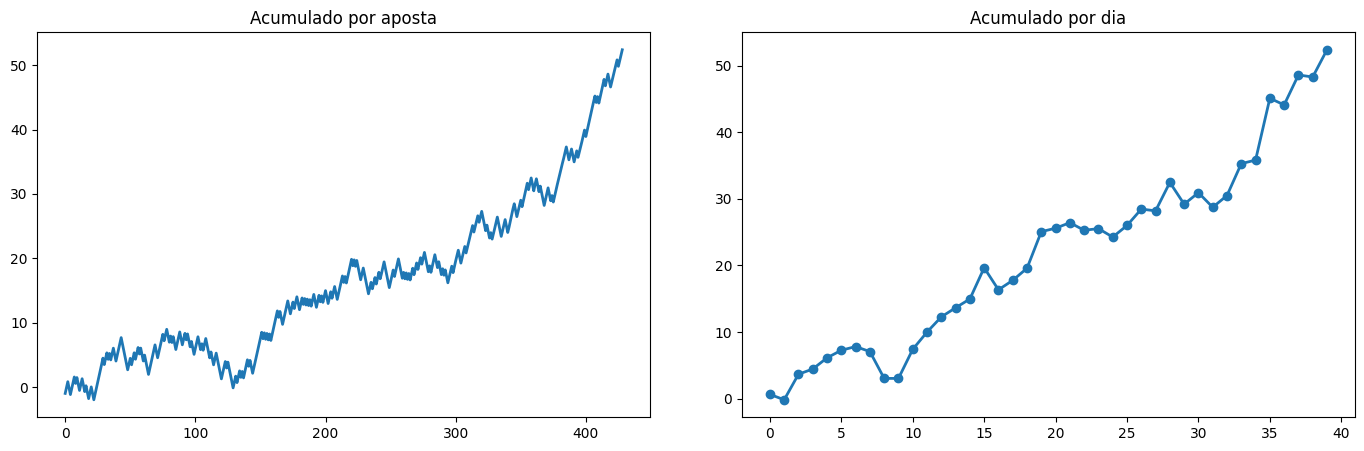


Jogos -------------------------------------


,Date,Home,Away,Home_Pts,Away_Pts,Odds_Over,Resultado,Profit,Acumulado
0,2023-10-20,NaN,NaN,NaN,NaN,1.91,red,-1.00,-1.00
1,2023-10-20,NaN,NaN,NaN,NaN,1.91,green,0.91,-0.09
2,2023-10-20,NaN,NaN,NaN,NaN,1.91,green,0.91,0.82
3,2023-10-20,NaN,NaN,NaN,NaN,1.91,red,-1.00,-0.18
4,2023-10-20,NaN,NaN,NaN,NaN,1.91,red,-1.00,-1.18
...,...,...,...,...,...,...,...,...,...
424,2023-11-28,Cleveland Cavaliers,Atlanta Hawks,128.0,105.0,1.89,green,0.89,50.83
425,2023-11-28,Miami Heat,Milwaukee Bucks,124.0,131.0,1.88,red,-1.00,49.83
426,2023-11-28,New York Knicks,Charlotte Hornets,115.0,91.0,1.83,green,0.83,50.66
427,2023-11-28,Minnesota Timberwolves,Oklahoma City Thunder,106.0,103.0,1.88,green,0.88,51.54



Dias --------------------------------------


,Date,Total_Profit,Qtd_Games,Acumulado
0,2023-10-20,0.64,0,0.64
1,2023-10-21,-0.81,0,-0.17
2,2023-10-22,3.84,0,3.67
3,2023-10-23,0.78,0,4.45
4,2023-10-24,1.68,0,6.13
5,2023-10-25,1.14,0,7.27
6,2023-10-26,0.55,0,7.82
7,2023-10-27,-0.75,0,7.07
8,2023-10-28,-4.03,0,3.04
9,2023-10-29,0.00,0,3.04


In [4]:
df_all = pd.DataFrame()
dias = glob.glob('../apostas_do_dia/*')

for dia in dias:
    dia = dia.split('\\')[1]
    dia = dia.split('.')[0]
    caminho = glob.glob(f'../apostas_do_dia/{dia}/*{METODO}*')
    if len(caminho) == 0:
        continue
    caminho = caminho[0]
    df = pd.read_csv(caminho)
    df_all = pd.concat([df_all, df])

temp = pd.read_csv('../data/Entire_Season.csv')
df_all = pd.merge(df_all, temp[['Date', 'Home', 'Away', 'Home_Pts', 'Away_Pts']], on=['Date', 'Home', 'Away'], how='left')
df_all = df_all.dropna(subset=['Home_Pts', 'Away_Pts'])
df_all['Home_Pts'] = df_all['Home_Pts'].astype(int)
df_all['Away_Pts'] = df_all['Away_Pts'].astype(int)

df_all.loc[(df_all['Home_Pts'] < df_all['Away_Pts']), TARGET] = 0
df_all.loc[(df_all['Home_Pts'] >= df_all['Away_Pts']), TARGET] = 1
df_all = pd.concat([df_hist, df_all])
df_all.reset_index(drop=True, inplace=True)

df_all.loc[(df_all[TARGET] == 0), 'Profit'] = - STAKE
df_all.loc[(df_all[TARGET] == 1), 'Profit'] = ((df_all[ODDS] * SPREAD) - 1) * STAKE
df_all['Profit'] = df_all['Profit'].round(2)

print('BACKTEST -----------------------')
print(f'WR: {wr:.2f}% | ROI: {roi:.2f}% | Drawdown: {drawdown:.2f}%')
print(f'MedGain: {med_gain:.2f} | MedLoss: {med_loss:.2f} | EV: {ev:.2f}')

print('\nREALIDADE -----------------------')
df_odds, df_by_day = get_results(df_all, TARGET, ODDS)

print('\nJogos -------------------------------------')
display(df_odds)
print('\nDias --------------------------------------')
display(df_by_day)